In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r"/Users/echozy_21/Desktop/Dataset/train.csv")
test = pd.read_csv(r"/Users/echozy_21/Desktop/Dataset/test.csv")

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace = True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

In [6]:
train["LoanAmount"].median()

128.0

In [7]:
train["LoanAmount"].fillna(128, inplace = True)
train["Loan_Amount_Term"].fillna(360, inplace = True)

In [8]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
train.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace = True)
test["Married"].fillna(test["Married"].mode()[0], inplace = True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace = True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace = True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace = True)
test["LoanAmount"].fillna(128, inplace = True)
test["Loan_Amount_Term"].fillna(360, inplace = True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
train2 = train.drop("Loan_ID", axis=1)
test2=test.drop("Loan_ID",axis=1)

In [12]:
X = train2.drop("Loan_Status",1)
Y = train2.Loan_Status

In [13]:
X.shape

(614, 11)

In [14]:
Y.head(5)

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [15]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [16]:
X = pd.get_dummies(X)
train2 = pd.get_dummies(train2)
test2=pd.get_dummies(test2)

In [17]:
X.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [18]:
train2["EMI"] = (train2["LoanAmount"]*0.09*(1.09**train2["Loan_Amount_Term"]))/(1.09**(train2["Loan_Amount_Term"]-1))
test2["EMI"] = (test2["LoanAmount"]*0.09*(1.09**test2["Loan_Amount_Term"]))/(1.09**(test2["Loan_Amount_Term"]-1))

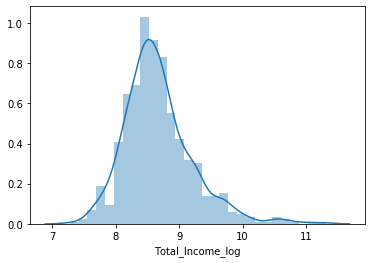

In [19]:
train2["Total_Income"] = train2["ApplicantIncome"] + train2["CoapplicantIncome"]
train2["Total_Income_log"] = np.log(train2["Total_Income"])
sns.distplot(train2["Total_Income_log"])

In [20]:
grid={"C" : np.logspace(-6,50,60), "penalty":['none','elasticnet']}

In [ ]:
score1 = 0
sumk=0
i = 1
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
for train_index,test_index in kf.split(X,Y):
    print("\n{} of KFold {}".format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = Y.loc[train_index],Y.loc[test_index]
    
    model = GridSearchCV(LogisticRegression(random_state=1), grid,scoring = 'accuracy')
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score1 = score + score1
    print("Accuracy Score",score)
    i+=1
    sumk=sumk+score
print("\n average accuracy is {}".format(sumk/10))


1 of KFold 10
Accuracy Score 0.7741935483870968

2 of KFold 10
